# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [56]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def load_data(data_path):
    data = np.loadtxt(data_path,delimiter=',')
    data = data.reshape(-1, 2)
    return data

In [58]:

def initialise_centers(data, K, init_centers=None):
    if init_centers!=None:
        return init_centers
    idx = np.random.choice(data.shape[0], K, replace=False)
    centers=data[idx]
    return centers


In [59]:
def initialise_labels(data):
    N=data.shape[0]
    label=np.ones(N)
    return label

In [60]:
def calculate_distances(data, centers):
    # data is Nx2, centers is Kx2 --> broadcasting
    
    diff = data[:, None, :] - centers[None, :, :]
    distances = np.sqrt(np.sum(diff ** 2, axis=2))

    return distances


In [61]:
def update_labels(distances):

    #argmin gives min value for a row along the coloumn
    new_labels=np.argmin(distances,axis=1) #new labels is N size array
    return new_labels

In [62]:
def update_centers(data, labels, K):
   
    sums = np.zeros((K, 2))
    counts = np.zeros(K)
    
    np.add.at(sums, labels, data)
    np.add.at(counts, labels, 1)
    
    new_centers = sums / counts[:, None]
    
    return new_centers

In [63]:
def check_termination(labels1, labels2):

    return np.array_equal(labels1,labels2)

In [64]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [65]:
def visualise(data_path, labels, centers):
    
    data= load_data(data_path)
    plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis', s=50)
    plt.scatter(centers[:,0],centers[:,1],c="red",marker='P',s=200)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("K-means clustering")
    plt.legend()
    plt.savefig("kmeans.png")
    plt.show()

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0004839897155761719


/var/folders/mj/0h3ldkcj667bndt2nsv482bh0000gn/T/ipykernel_33665/344298921.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


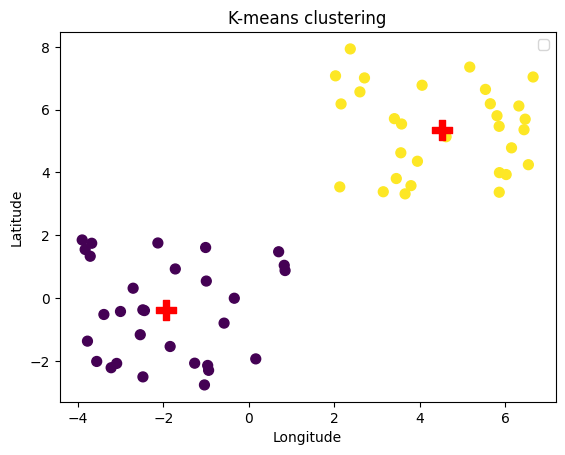

<module 'matplotlib.pyplot' from '/Users/adityapathak/Desktop/wids/env/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [66]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)